In [6]:
import pandas as pd
import numpy as np
from pandas import Series
from datetime import datetime


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
pwd

'C:\\Users\\Shubham\\Anaconda3'

In [15]:
pwd

'C:\\Users\\Shubham\\Anaconda3'

In [16]:
train = pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv('Test_0qrQsBZ.csv')

In [17]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [18]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
ID          5112 non-null int64
Datetime    5112 non-null object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


In [20]:
#conversion of datetime column into datetime object

train['Datetime']=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')

In [21]:
test['Datetime']=pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')

In [22]:
#Creating separate columns for year,month,day and hour in respective dataframes
for tm in (train, test):
    tm['year'] = tm.Datetime.dt.year
    tm['month'] = tm.Datetime.dt.month
    tm['day'] = tm.Datetime.dt.day
    tm['Hour'] = tm.Datetime.dt.hour

In [23]:
train.head(5)

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [24]:
test.head(5)

,ID,Datetime,year,month,day,Hour
0,18288,2014-09-26 00:00:00,2014,9,26,0
1,18289,2014-09-26 01:00:00,2014,9,26,1
2,18290,2014-09-26 02:00:00,2014,9,26,2
3,18291,2014-09-26 03:00:00,2014,9,26,3
4,18292,2014-09-26 04:00:00,2014,9,26,4


train2=train.copy()

In [25]:
train['day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [26]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else: return 0

In [27]:
temp2 = train['Datetime'].apply(applyer) # function call without args
train['weekend'] = temp2
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


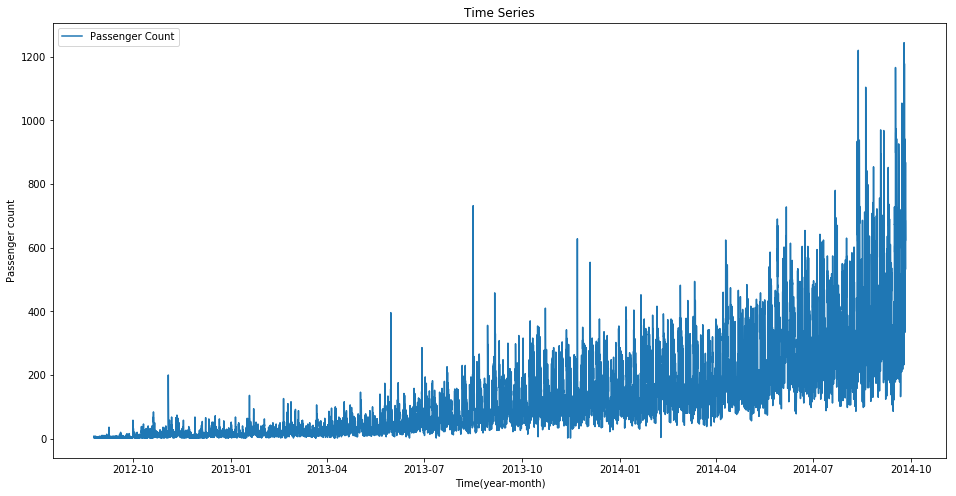

In [28]:
train.index = train['Datetime']
df = train.drop('ID', 1)
ts = df['Count']
plt.figure(figsize=(16, 8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel('Passenger count')
plt.legend(loc='best')

In [29]:
#Exploratory Analysis
#Analyse the various hidden trends and seasonalities in data
train.groupby('year')['Count'].mean()
#The passenger count for 2014 is way higher than 2013 and 2012.

year
2012     11.282946
2013     78.306849
2014    283.017102
Name: Count, dtype: float64

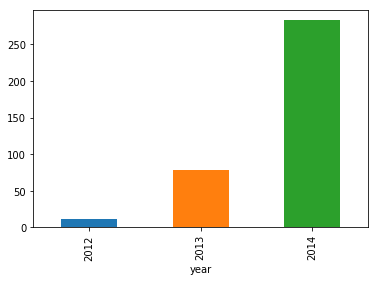

In [30]:
(train.groupby('year')['Count'].mean()).plot.bar()

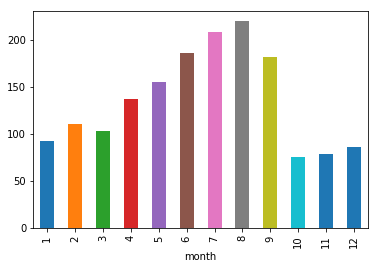

In [31]:
train.groupby('month')['Count'].mean().plot.bar()

In [32]:
temp3=train.groupby(['year', 'month'])['Count'].mean()

In [33]:
temp3

year  month
2012  8          2.952381
      9          4.444444
      10        10.986559
      11        15.827778
      12        15.680108
2013  1         18.430108
      2         22.190476
      3         23.588710
      4         34.405556
      5         45.612903
      6         57.333333
      7         74.787634
      8        100.137097
      9        120.744444
      10       139.932796
      11       141.000000
      12       157.387097
2014  1        167.204301
      2        200.202381
      3        183.994624
      4        240.955556
      5        264.497312
      6        316.113889
      7        343.354839
      8        389.981183
      9        468.433333
Name: Count, dtype: float64

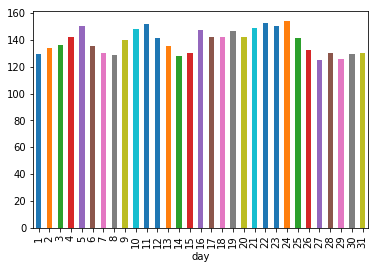

In [34]:
#Day wise Data
train.groupby('day')['Count'].mean().plot.bar()

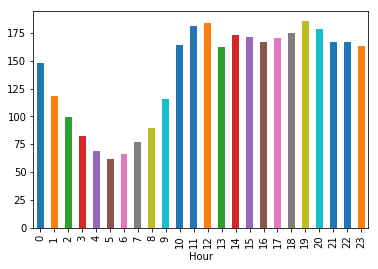

In [35]:
#Hourly data
train.groupby('Hour')['Count'].mean().plot.bar()

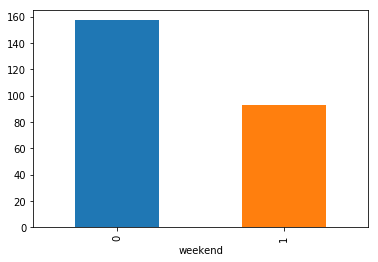

In [36]:
#Analysis of data weekend wise
train.groupby('weekend')['Count'].mean().plot.bar()
#Traffic at weekdays seems to be higher than that of weekends

In [37]:
#Plot the data against various time intervals periodically
train['Timestamp'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train['Timestamp']

In [38]:
hourly = train.resample('H').mean()

In [39]:
daily = train.resample('D').mean() 

In [40]:
weekly = train.resample('W').mean()

In [41]:
monthly = train.resample('M').mean()

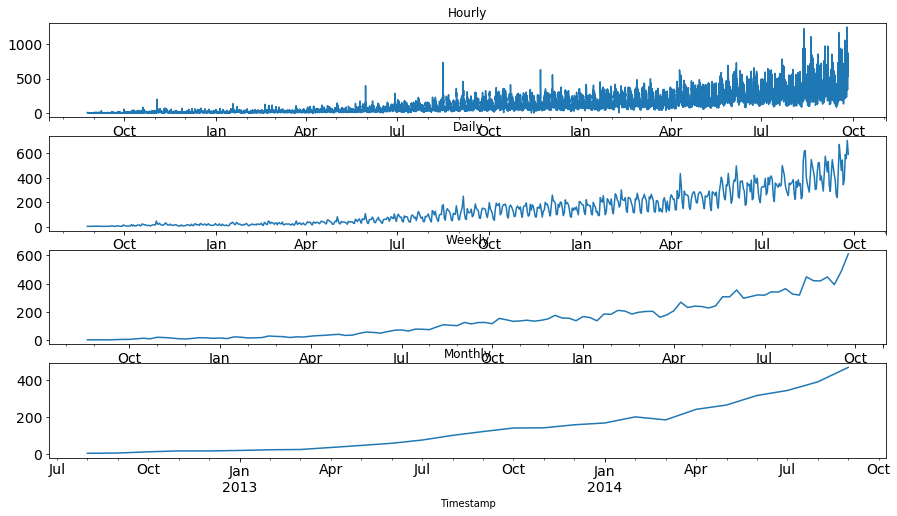

In [42]:
fig, axs = plt.subplots(4, 1)

hourly.Count.plot(figsize=(15, 8), title='Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15, 8), title='Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15, 8), title='Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15, 8), title='Monthly', fontsize=14, ax=axs[3])

plt.show()

In [45]:
monthly

,ID,Count,year,month,day,Hour,day of week,weekend
Timestamp,,,,,,,,
2012-08-31,83.5,2.952381,2012.0,8.0,28.0,11.5,3.000000,0.285714
2012-09-30,527.5,4.444444,2012.0,9.0,15.5,11.5,3.166667,0.333333
2012-10-31,1259.5,10.986559,2012.0,10.0,16.0,11.5,2.806452,0.258065
2012-11-30,1991.5,15.827778,2012.0,11.0,15.5,11.5,3.033333,0.266667
2012-12-31,2723.5,15.680108,2012.0,12.0,16.0,11.5,3.064516,0.322581
2013-01-31,3467.5,18.430108,2013.0,1.0,16.0,11.5,2.903226,0.258065
2013-02-28,4175.5,22.190476,2013.0,2.0,14.5,11.5,3.000000,0.285714
2013-03-31,4883.5,23.588710,2013.0,3.0,16.0,11.5,3.193548,0.322581
2013-04-30,5615.5,34.405556,2013.0,4.0,15.5,11.5,2.833333,0.266667


In [46]:
test.head()

,ID,Datetime,year,month,day,Hour
0,18288,2014-09-26 00:00:00,2014,9,26,0
1,18289,2014-09-26 01:00:00,2014,9,26,1
2,18290,2014-09-26 02:00:00,2014,9,26,2
3,18291,2014-09-26 03:00:00,2014,9,26,3
4,18292,2014-09-26 04:00:00,2014,9,26,4


In [47]:
weekly.head()

,ID,Count,year,month,day,Hour,day of week,weekend
Timestamp,,,,,,,,
2012-08-26,23.5,3.416667,2012.0,8.000000,25.500000,11.5,5.5,1.000000
2012-09-02,131.5,3.345238,2012.0,8.285714,21.142857,11.5,3.0,0.285714
2012-09-09,299.5,3.654762,2012.0,9.000000,6.000000,11.5,3.0,0.285714
2012-09-16,467.5,3.119048,2012.0,9.000000,13.000000,11.5,3.0,0.285714
2012-09-23,635.5,4.714286,2012.0,9.000000,20.000000,11.5,3.0,0.285714


In [48]:
yearly.head()

NameError: name 'yearly' is not defined

In [49]:
yearly = train.resample('Y').mean()

In [50]:
train.count()

ID             18288
Datetime       18288
Count          18288
year           18288
month          18288
day            18288
Hour           18288
day of week    18288
weekend        18288
Timestamp      18288
dtype: int64

In [51]:
test['Timestamp'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test['Timestamp']

# converting into daily mean
test = test.resample('D').mean()

train['Timestamp'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train['Timestamp']

# converting into daily mean
train = train.resample('D').mean()

In [52]:
train.head()

,ID,Count,year,month,day,Hour,day of week,weekend
Timestamp,,,,,,,,
2012-08-25,11.5,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,35.5,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,59.5,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,83.5,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,107.5,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [53]:
daily.head()

,ID,Count,year,month,day,Hour,day of week,weekend
Timestamp,,,,,,,,
2012-08-25,11.5,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,35.5,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,59.5,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,83.5,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,107.5,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [54]:
test.head()

,ID,year,month,day,Hour
Timestamp,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5
2014-09-27,18323.5,2014.0,9.0,27.0,11.5
2014-09-28,18347.5,2014.0,9.0,28.0,11.5
2014-09-29,18371.5,2014.0,9.0,29.0,11.5
2014-09-30,18395.5,2014.0,9.0,30.0,11.5


In [55]:
#Splitting data-training and validation

In [56]:
Train = train.loc['2012-08-25':'2014-06-24']
valid = train.loc['2014-06-25':'2014-09-25']

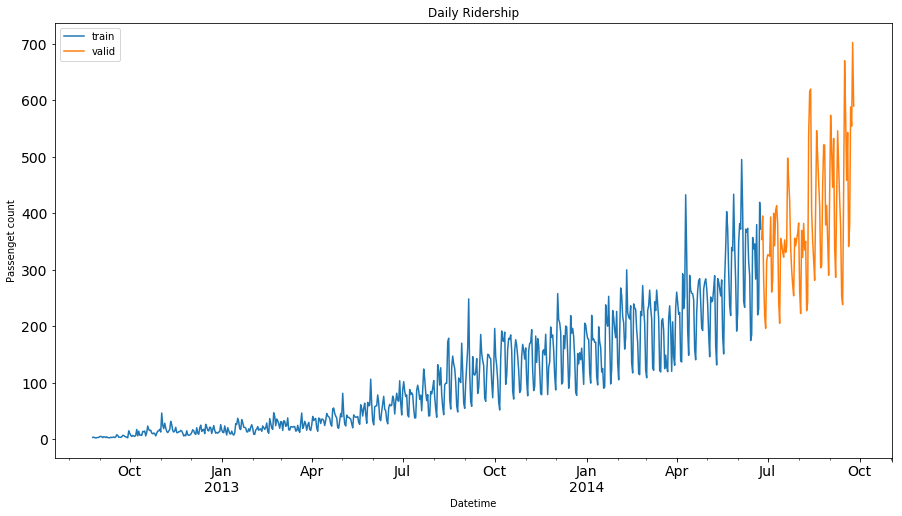

In [57]:
Train.Count.plot(figsize=(15, 8), title='Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15, 8), title='Daily Ridership', fontsize=14, label='valid')
plt.xlabel('Datetime')
plt.ylabel('Passenget count')
plt.legend(loc='best')
plt.show()

In [58]:
#Modelling techniques

In [59]:
vals = np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = vals[len(vals)-1]

In [60]:
y_hat.naive.head()

Timestamp
2014-06-25    372.166667
2014-06-26    372.166667
2014-06-27    372.166667
2014-06-28    372.166667
2014-06-29    372.166667
Freq: D, Name: naive, dtype: float64

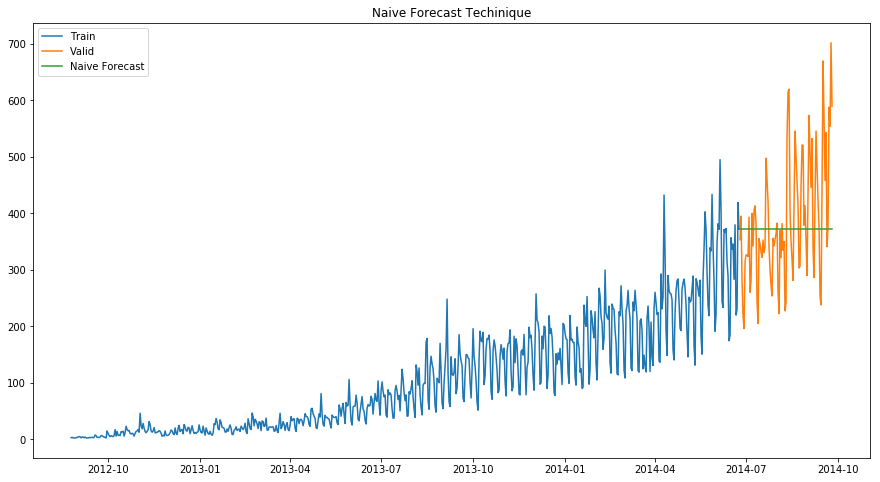

In [61]:
plt.figure(figsize=(15, 8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index, valid['Count'], label='Valid')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Forecast Techinique')
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [63]:
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive)) # observed values and predicted values
rms

111.79050467496724

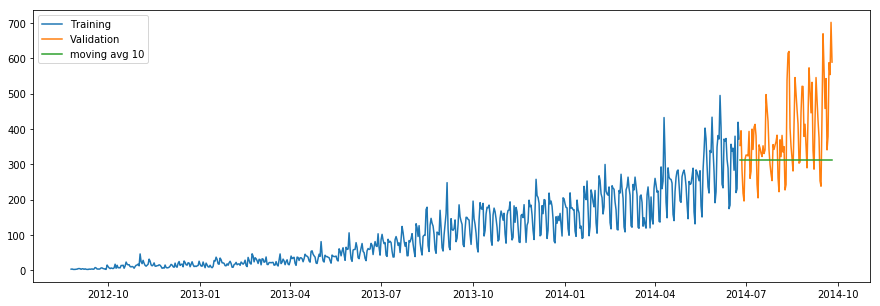

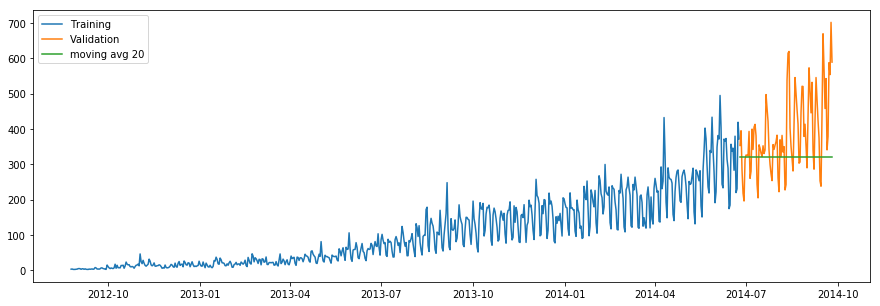

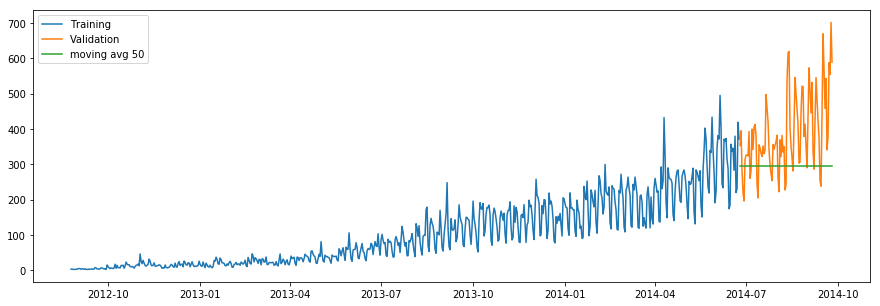

In [64]:
#Moving Averages

y_hat_avg_10 = valid.copy()
y_hat_avg_10['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]
plt.figure(figsize=(15, 5))
plt.plot(Train['Count'], label='Training')
plt.plot(valid['Count'], label='Validation')
plt.plot(y_hat_avg_10['moving_avg_forecast'], label='moving avg 10')
plt.legend(loc='best')
plt.show()
y_hat_avg_20 = valid.copy()
y_hat_avg_20['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]
plt.figure(figsize=(15, 5))
plt.plot(Train['Count'], label='Training')
plt.plot(valid['Count'], label='Validation')
plt.plot(y_hat_avg_20['moving_avg_forecast'], label='moving avg 20')
plt.legend(loc='best')
plt.show()
y_hat_avg_50 = valid.copy()
y_hat_avg_50['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize=(15, 5))
plt.plot(Train['Count'], label='Training')
plt.plot(valid['Count'], label='Validation')
plt.plot(y_hat_avg_50['moving_avg_forecast'], label='moving avg 50')
plt.legend(loc='best')
plt.show()

In [65]:
rms = sqrt(mean_squared_error(valid['Count'], y_hat_avg_50['moving_avg_forecast']))
rms

144.19175679986802

In [66]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

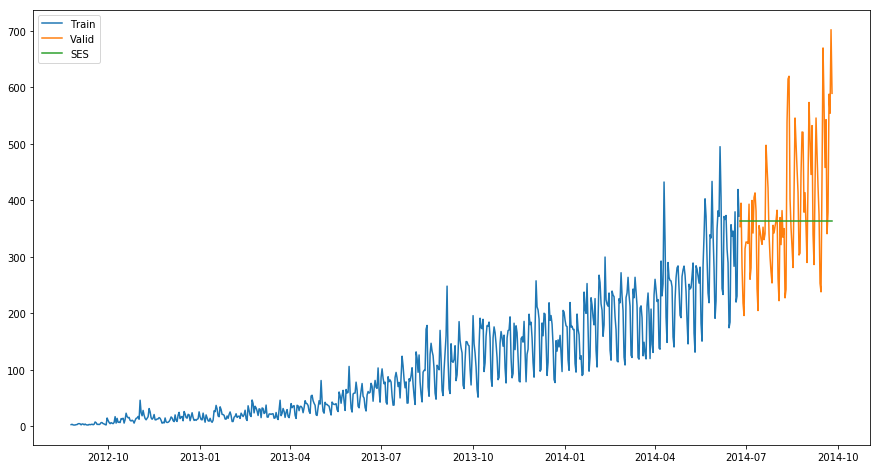

In [67]:
y_hat_exp = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6, optimized=False)
y_hat_exp['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(15, 8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_exp['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [68]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_exp['SES']))
rms

113.43708111884514

In [69]:
import statsmodels.api as sm

<Figure size 1080x576 with 0 Axes>

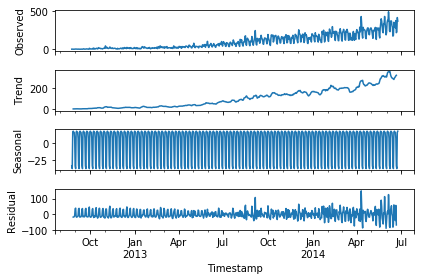

In [70]:
plt.figure(figsize=(15, 8))
sm.tsa.seasonal_decompose(Train['Count']).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

In [71]:
result

(2.9863509590138566,
 1.0,
 20,
 741,
 {'1%': -3.4392057325732104,
  '5%': -2.8654483492874236,
  '10%': -2.5688512291811225},
 7212.068059584323)

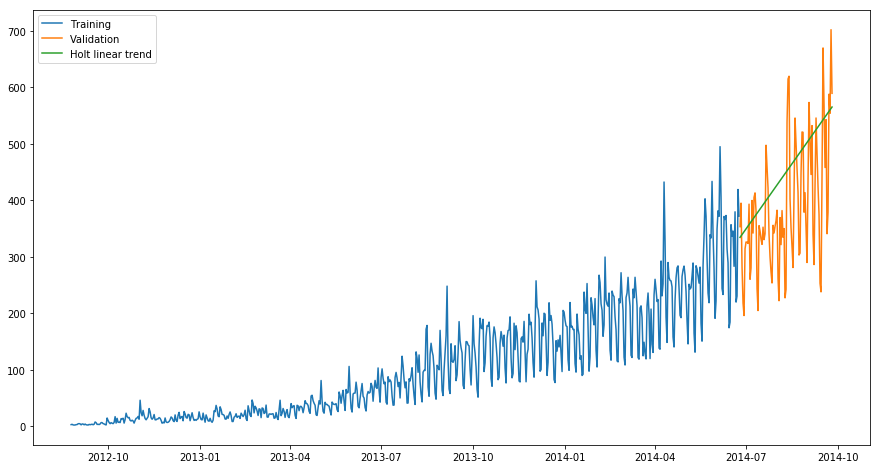

In [72]:
y_hat_holt = valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level=0.3, smoothing_slope=0.1)
y_hat_holt['Holt_linear'] = fit1.forecast(len(valid))
plt.figure(figsize=(15, 8))
plt.plot(Train['Count'], label='Training')
plt.plot(valid['Count'], label='Validation')
plt.plot(y_hat_holt['Holt_linear'], label='Holt linear trend')
plt.legend(loc='best')
plt.show()